In [ ]:
from IPython.display import Image
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.collections import LineCollection
#from scipy.special import hermite, factorial, eval_hermite
import os
import glob
import shutil
import matplotlib.style as style
import pandas as pd


style.use('dark_background')
plt.rcParams['text.usetex'] = False



#display screenshots
for i in range(1, 3):
    display(Image(filename=f'p_statement/p{i}.jpg'))

#file moving for housekeeping
def move_plots():
    output_dir = 'graphs'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    #all gif and png
    files_to_move = glob.glob('*.png') + glob.glob('*.gif')

    for file in files_to_move:
        destination = os.path.join(output_dir, file)

        #if exists, replace
        if os.path.exists(destination):
            os.remove(destination)

        #move it
        shutil.move(file, destination)
        print(f'Moved {file} to {output_dir}')

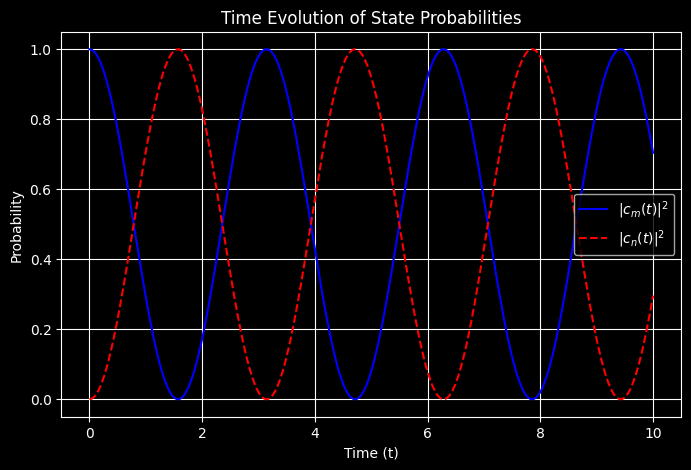

coefficients are: 



cos(V*t/hbar)

-I*sin(V*t/hbar)

Max deviation from probability sum of 1: 0.00


In [3]:
##problem 1
#numerically first will go into graph

#params, will use arb units
hbar = 1
V = 1
t_vals = np.linspace(0, 10, 500)

#compute coeff
c_m = np.cos(V * t_vals / hbar)
c_n = -1j * np.sin(V * t_vals / hbar)  #e^(iθ) = 1 for simplicity

#plt
plt.figure(figsize=(8, 5))
plt.plot(t_vals, np.abs(c_m)**2, label=r'$|c_m(t)|^2$', linestyle='-', color='b')
plt.plot(t_vals, np.abs(c_n)**2, label=r'$|c_n(t)|^2$', linestyle='--', color='r')
plt.xlabel('Time (t)')
plt.ylabel('Probability')
plt.title('Time Evolution of State Probabilities')
plt.legend()
plt.grid()
plt.show()


#vars
t, V, hbar = sp.symbols('t V hbar', real=True, positive=True)

#time dependent coefficients
c_m_sym = sp.cos(V * t / hbar)
c_n_sym = -sp.I * sp.sin(V * t / hbar)  # Assuming e^(iθ) = 1

#check symbolically for probability conservation
prob_sum_sym = sp.simplify(sp.Abs(c_m_sym)**2 + sp.Abs(c_n_sym)**2)

#show symbolically
print('coefficients are: \n')
display(c_m_sym, c_n_sym)

#verify numerically for probability conservation
prob_sum = np.abs(c_m)**2 + np.abs(c_n)**2
print(f"Max deviation from probability sum of 1: {np.max(np.abs(prob_sum - 1)):.2f}")

In [4]:
#step 1 def hamiltonian in degen subspace
H_prime = sp.Matrix([[sp.Symbol('epsilon', real=True), V], 
                     [V, sp.Symbol('epsilon', real=True)]])

#solve eigevalues of H'
eigenvalues = H_prime.eigenvals()
print('eigenvalues of H:')
display(eigenvalues)


#solve for evects of H'
eigenvectors = H_prime.eigenvects()
print('the eigenvectors of H:\n\n')
sp.pprint(eigenvectors)


#def coupled diffeq for t-evo
c_m, c_n = sp.Function('c_m')(t), sp.Function('c_n')(t)
eq1 = sp.Eq(sp.I * hbar * sp.diff(c_m, t), V * c_n)
eq2 = sp.Eq(sp.I * hbar * sp.diff(c_n, t), V * c_m)
print('coupled diffeqs are:')
display(eq1,eq2)

#sympy solve it
solution = sp.dsolve([eq1, eq2], [c_m, c_n])
print('The solution:\n\n')
sp.pprint(solution)

#solve for c1 and c2 bc we know c_m(0) = 1, c_n(0) = 0
initial_conditions = [
    solution[0].subs(t, 0).rhs - 1,  #c_m(0) = 1
    solution[1].subs(t, 0).rhs       #c_n(0) = 0
]

#solve and print
C_values = sp.solve(initial_conditions, ['C1', 'C2'])
print('the values for C are:')
display(C_values)




eigenvalues of H:


{V + epsilon: 1, -V + epsilon: 1}

the eigenvectors of H:


⎡⎛           ⎡⎡-1⎤⎤⎞  ⎛          ⎡⎡1⎤⎤⎞⎤
⎢⎜-V + ε, 1, ⎢⎢  ⎥⎥⎟, ⎜V + ε, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝           ⎣⎣1 ⎦⎦⎠  ⎝          ⎣⎣1⎦⎦⎠⎦
coupled diffeqs are:


Eq(I*hbar*Derivative(c_m(t), t), V*c_n(t))

Eq(I*hbar*Derivative(c_n(t), t), V*c_m(t))

The solution:


⎡            -ⅈ⋅V⋅t        ⅈ⋅V⋅t              -ⅈ⋅V⋅t        ⅈ⋅V⋅t⎤
⎢            ───────       ─────              ───────       ─────⎥
⎢               h̅            h̅                   h̅            h̅  ⎥
⎣cₘ(t) = C₁⋅ℯ        - C₂⋅ℯ     , cₙ(t) = C₁⋅ℯ        + C₂⋅ℯ     ⎦
the values for C are:


{C1: 1/2, C2: -1/2}

In [5]:
#problem 2
#redef symbols to clear
A, hbar, gamma, omega, m = sp.symbols('A hbar gamma omega m', real=True, positive=True)
n = sp.symbols('n', integer=True, positive=True)
x = sp.Symbol('x', real=True)
a, a_dag = sp.symbols('a a_dag')

#position ladder operator for x1
x_op = sp.sqrt(hbar / (2 * m * omega)) * (a + a_dag)

#x**2
x2_op = x_op**2

#we now want matrix element <n|x^2|0>
n0_matrix_element = sp.simplify(sp.expand(x2_op))

#compute transition prob
omega_n0 = n * omega
prob_0_to_n = (A**2 * n0_matrix_element**2) / (hbar**2 * (gamma**2 + omega_n0**2))
display(prob_0_to_n)


A**2*(a**2 + 2*a*a_dag + a_dag**2)**2/(4*m**2*omega**2*(gamma**2 + n**2*omega**2))

In [6]:
#this is all i can do until next lecture

In [9]:
#vars problem 3, will use sympy first to solve all
L, x = sp.symbols('L x', real=True, positive=True)
V0, tau, hbar, omega21 = sp.symbols('V0 tau hbar omega21', real=True, positive=True)

#def of wavefunction
phi_1 = sp.sqrt(2/L) * sp.sin(sp.pi * x / L)
phi_2 = sp.sqrt(2/L) * sp.sin(2 * sp.pi * x / L)
print('wavefunction 1 and 2 are:\n')
display(phi_1,phi_2)


#compute matrix element of <2|x^2|1>
x_squared = x**2
matrix_element = sp.integrate(phi_2 * x_squared * phi_1, (x, 0, L))
print('the matrix element<2|x^2|1> is:')
display(matrix_element)

#compute prob expression
probability = (V0/hbar)**2 * matrix_element**2 / ((1/tau)**2 + omega21**2)
print('the probability expression is:')
display(probability.simplify())



wavefunction 1 and 2 are:



sqrt(2)*sin(pi*x/L)/sqrt(L)

sqrt(2)*sin(2*pi*x/L)/sqrt(L)

the matrix element<2|x^2|1> is:


-16*L**2/(9*pi**2)

the probability expression is:


256*L**4*V0**2*tau**2/(81*pi**4*hbar**2*(omega21**2*tau**2 + 1))

In [14]:
##p4
#clear and def symbols
omega, omega1 = sp.symbols('omega omega1', real=True, positive=True)

#effective frequency
omega_eff = sp.sqrt(omega1**2 + omega**2)

#berry phase with exact formula
gamma_exact = sp.pi * (1 - omega1 / omega_eff)

#expanded to first order
gamma_approx = sp.series(gamma_exact, omega, n=3).removeO() #second

#print and display
print('gamma and gamma approx are:')
display(gamma_exact, gamma_approx)


gamma and gamma approx are:


pi*(-omega1/sqrt(omega**2 + omega1**2) + 1)

pi*omega**2/(2*omega1**2)